# Introduction to Machine Learning: Classification and Clustering

In classification, we use machine learning algorithms to assign a class label to a given data. A **classifier** is an algorithm that is used to map the input data to a specific category. **Classification models** are built using a classifier algorithm and predict a class for input data, which are usually organized in a table format, called **Feature Matrix**. In a feature matrix, each row represents individual observations and the columns represent properties or features. This layout is often contained in a NumPy ndarray or a Pandas DataFrame and will have a shape of [n_samples, n_features]. Feature matrix is often stored as X, while labels are conventionally stored as y.

## Logistic Regression

One of classification algorithms is Logistic Regression, which is used to model the probability of a certain class or event, such as pass/fail. Logistic Regression uses a logistic function or sigmoid function to return a probability value that can be mapped to two or more discrete classes. It can be used for both **Binary classification** and **Multi-class classification**.

![Image](https://www.natasshaselvaraj.com/content/images/size/w2000/2022/11/Picture2-1.png)

Logistic regression is easy to implement and efficient to train. However, it has high reliance on a proper representation of data.

We start with importing necessary libraries:



In [20]:
from IPython import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

`Scikit-learn` comes with a few small standard datasets and can be easily loaded using the `dataset` library. For this exercise, we will use `load_iris` to load the iris dataset and turn it into a Pandas DataFrame for easy data manipulation:

In [21]:
# import iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Here we can see that the iris data frame contains the length and width of sepals and petals including the target column which is the numerical representation of classes of Iris flowers that we need to classify (e.g., Setosa(0), Versicolor(1),  Virginica(2)).

We can add one more column with names of different species corresponding to their numerical values.

![image](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEimmGMPw0jM_8xjndEHLKj7Hf5fngvWFOJ6_V4jiFb-U0sCHej3aTu08htye1_BgUBGKfnszHoeI_OLLZVf6NjwaG9oDYyOqkjdjeDajd3zg8VuCLVTzDM8hO2XEnarwQeM-CLvFgAwfNX53GR_HPatNPkUH7-7FAoNgFKjw7ujB9LwW5piE8GIPLjJHw/s722/irir_flowers.png)

In [22]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris_df['species'] = species

iris_df.info()
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa




Visualizing data always help us to understand the relationships between input features and targets. For this purpose, we create a scatter plot with the two features are horizontal and vertical axis and the assigned class used for the color.

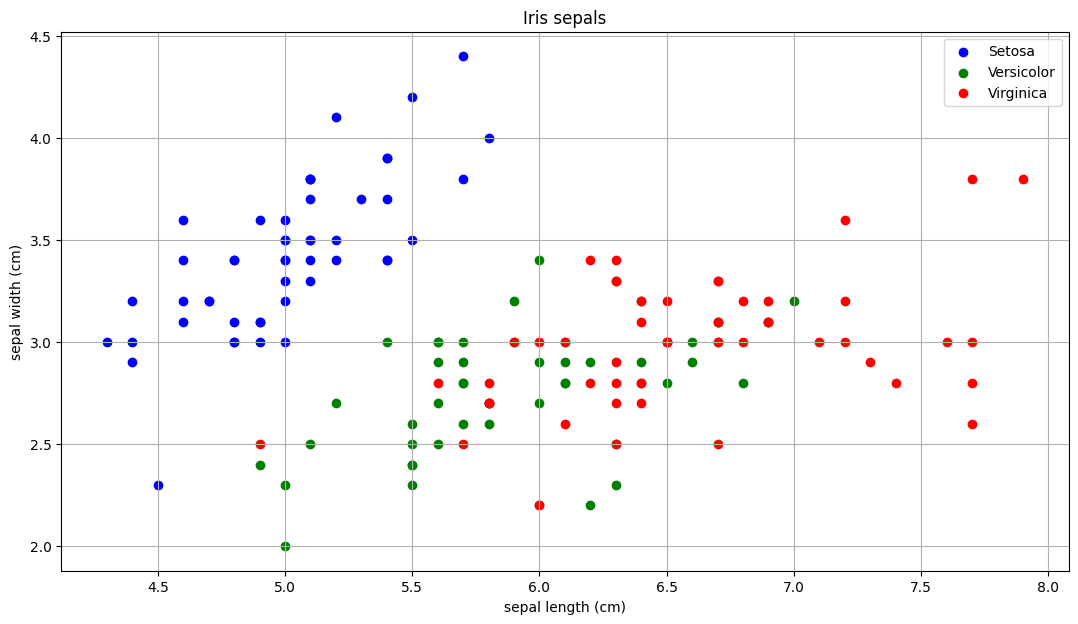

In [23]:
setosa = iris_df[iris_df.species == "setosa"]
versicolor = iris_df[iris_df.species=='versicolor']
virginica = iris_df[iris_df.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris sepals")
ax.legend()

Let's store the two features in `X` as the independent variables, and the target in `y` as the dependent variable.

In [24]:
X = iris_df.iloc[:, 0:2]
y = iris_df['target']

We split variables into training and testing sets, build the model on the training set, and evaluate it on the testing set using `train_test_split` from `sklearn.model_selection`. Commonly, data is randomly split into 75% training and 25% testing, but it can vary based on dataset size and the problem.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

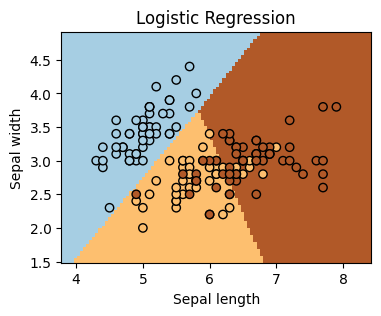

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)


_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)

plt.title('Logistic Regression')
plt.show()

Performance measures are used to evaluate the effectiveness of classifiers. For classification problems, there are three main measures for evaluating the model.  To clarify the three measures, take a look at the following matrix, called **Confusion Matrix**, for a binary classificaiton:

![image](https://hackernoon.imgix.net/images/BYWRsHWtmGOUC5N4fwNhMqohMAC3-c9c3gxs.png)

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

**Accuracy** is the ratio of correct predictions to the total number of predictions. A high precision score indicates that the model is making fewer false positive predictions, meaning that when it predicts an instance as positive, it is more likely to be correct. A model that produces no false positives has a precision of 1.0.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Precision** is the proportion of correct positive predictions over all positive predictions:

$$
Precision = \frac{TP}{TP + FP}
$$

and **Recall** is the proportion of true positive predictions out of all the actual positive instances in the dataset. A high recall score indicates that the model is effectively capturing positive instances, and there are fewer false negatives, meaning that it is less likely to miss positive instances. A model that produces no false negatives has a recall of 1.0.

$$
Recall = \frac{TP}{TP + FN}
$$

Unfortunately, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa. To learn more about this dynamic, take a look at [this webpage](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall).

F1 score is another measure used in classification which provides a balance between precision and recall, taking into account both false positives and false negatives.

$$
F1 Score = \frac{2\times(Precision \times Recall)}{Precision + Recall}
$$

The F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall, and 0 indicates poor performance. F1 score is used mainly when the dataset is imbalanced, and one class dominates the other or when both false positives and false negatives are equally important.

In [28]:
from sklearn.metrics import classification_report

accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test, logreg_pred, digits=3))

Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        15
         1.0      0.778     0.636     0.700        11
         2.0      0.714     0.833     0.769        12

    accuracy                          0.842        38
   macro avg      0.831     0.823     0.823        38
weighted avg      0.845     0.842     0.840        38



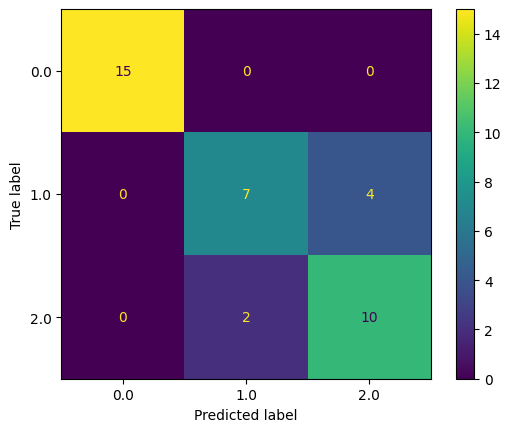

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

## Support Vector Matrix (SVM)

SVM is a popular supervised machine learning algorithm used for both classification and regression tasks. SVM is particularly effective in scenarios where the data can be transformed into a higher-dimensional space where it becomes separable. The main objective of SVM is to find the optimal hyperplane that best divides the data points of different classes in a way that maximizes the margin between the classes. The hyperplane is a decision boundary that separates the data points into different classes based on their features.

The SVM algorithm aims to maximize the distance between the hyperplane and the closest data points from each class, called **margin**, as it is believed to provide better generalization to unseen data. The data points that lie closest to the hyperplane and directly influence the position of the hyperplane are called **support vectors**. These are the critical data points that determine the decision boundary.

SVM can handle nonlinearly separable data by mapping the original features into a higher-dimensional space using a **kernel function**. The kernel trick allows the algorithm to find a hyperplane in this transformed space, even if it was not linearly separable in the original feature space.
SVM is versatile and widely used in various applications.

SVM can be computationally expensive, especially for large datasets, and it requires careful selection of hyperparameters, such as the regularization parameter (C) and the choice of the kernel function. Additionally, SVM might not perform well when the data is highly imbalanced or when the number of features significantly exceeds the number of samples.

![image](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

As we already have `X_train` and `y_train`, lets use them to train a SVM model.

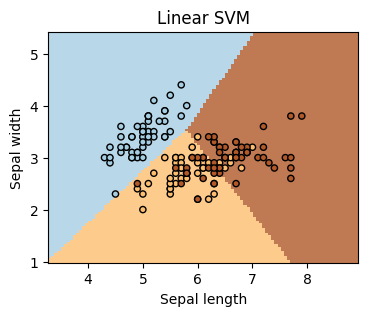

In [39]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear', gamma=10)
svm_linear.fit(X_train, y_train)

svm_linear_pred = svm_linear.predict(X_test)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
  svm_linear,
  X,
  response_method="predict",
  plot_method="pcolormesh",
  cmap=plt.cm.Paired,
  alpha=0.8,
  ax=ax,
  xlabel="Sepal length",
  ylabel="Sepal width",
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, s=20, edgecolors="k")

plt.title('Linear SVM')
plt.show()

In [41]:
accuracy = svm_linear.score(X_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test, svm_linear_pred, digits=3))

Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        15
         1.0      0.778     0.636     0.700        11
         2.0      0.714     0.833     0.769        12

    accuracy                          0.842        38
   macro avg      0.831     0.823     0.823        38
weighted avg      0.845     0.842     0.840        38



The linear kernel is the simplest kernel and is suitable for linearly separable data. The linear kernel is computationally efficient and is often a good starting point for linearly separable problems.

The **polynomial** kernel is used when the data can be separated by a polynomial hyperplane. It allows for more complex decision boundaries by transforming the data into a higher-dimensional space using polynomials of a given degree. The degree of the polynomial is a hyperparameter that needs to be tuned.

RBF (Radial Basis Function) Kernel or Gaussian Kernel is one of the most commonly used kernels in SVM. It is suitable for data that is not linearly separable and transforms the data into an infinite-dimensional space based on the distance from a reference point (center). The "gamma" parameter is a hyperparameter that determines the spread of the kernel, controlling the influence of individual data points on the decision boundary.

You can change the kernel to polynomial or RBF using the `poly` or `rbf` keyword. Build a SVM model with polynomial or RBF kernel and compare its performance with a linear kernel.

In [ ]:
# Write your code here

# Change the SVM kernel to 'poly' or 'rbf' and draw the decision boundaries

In [ ]:
# Write your code here

# Print accuracy, precision, and recall for polynomial or rbf SVM

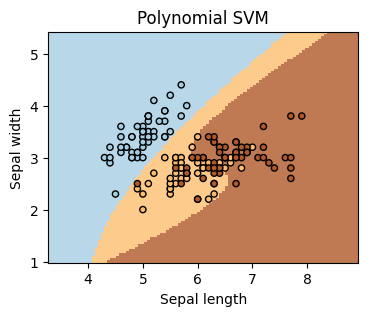

In [45]:
# @title
from sklearn import svm
svm_poly = svm.SVC(kernel='poly', gamma=10)
svm_poly.fit(X_train, y_train)

svm_poly_pred = svm_poly.predict(X_test)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
  svm_poly,
  X,
  response_method="predict",
  plot_method="pcolormesh",
  cmap=plt.cm.Paired,
  alpha=0.8,
  ax=ax,
  xlabel="Sepal length",
  ylabel="Sepal width",
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, s=20, edgecolors="k")

plt.title('Polynomial SVM')
plt.show()

In [46]:
# @title
accuracy = svm_poly.score(X_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test, svm_poly_pred, digits=3))

Accuracy: 0.868421052631579
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        15
         1.0      0.875     0.636     0.737        11
         2.0      0.733     0.917     0.815        12

    accuracy                          0.868        38
   macro avg      0.869     0.851     0.851        38
weighted avg      0.880     0.868     0.865        38



## Decision Tree

Decision trees has a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label (in the case of classification) or a numerical value (in the case of regression).

The decision tree algorithm recursively partitions the data into subsets based on the values of the input features, making decisions at each internal node based on which feature provides the best split to separate the data into the different classes or predict the target variable in the most effective way.

Here's an example tree that shows your chance of surviving the Titanic disaster. What we are creating is series of question that when answered will put observations into a _bucket_ or in other terms one of the classification options. We also devise a probability associated with an observation falling into that _bucket_.

The features are described by the labels, however ``sibsp`` - is the number of spouses or siblings on board.

![dtree](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)

So in this tree the most important question to ask first is what is the gender of the person you are considering, then next most important question is age above 9 and a half, followed lastly by, does this person have less than three spouses or siblings on board.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)


# Write your code here

# Plot the decision boundary
# Print evaluation metrics

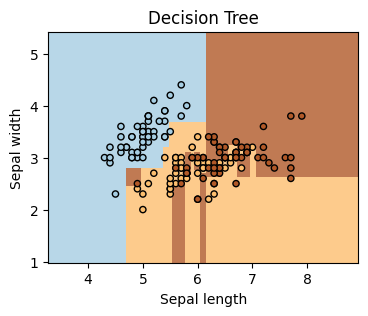

In [47]:
# @title
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

tree_clf_pred = tree_clf.predict(X_test)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
  tree_clf,
  X,
  response_method="predict",
  plot_method="pcolormesh",
  cmap=plt.cm.Paired,
  alpha=0.8,
  ax=ax,
  xlabel="Sepal length",
  ylabel="Sepal width",
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, s=20, edgecolors="k")

plt.title('Decision Tree')
plt.show()

In [48]:
# @title
accuracy = tree_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test, tree_clf_pred, digits=3))

Accuracy: 0.6578947368421053
              precision    recall  f1-score   support

         0.0      1.000     0.933     0.966        15
         1.0      0.417     0.455     0.435        11
         2.0      0.500     0.500     0.500        12

    accuracy                          0.658        38
   macro avg      0.639     0.629     0.633        38
weighted avg      0.673     0.658     0.665        38



## Comparison of classification methods:

- **Linearity**: logistic regression is a linear classifier, meaning the boundaries are always linear. SVM and decision trees can handle both linear and non-linear classifications tasks by using different kernels or partitioning the feature space, respectively.

- **Interpretability**: Logistic regression is highly interpretable since the coefficients of the features can be directly interpreted as the influence on the target class probability. When using a linear kernel for SVM, it can also be interpretable. However, with nonlinear kernels, interpretability reduces. Decision trees are also interpretable as the decision rules are straightforward to understand.

- **Model complexity and overfitting**: Logistic regression is a simple model, less prone to overfitting when the feature space is not very complex. SVM with a complex kernel and decision trees are more prone to overfitting.

- **Scalability**: Training time can be slow for SVM with nonlinear kernels. Also, decision trees with high depth and complexity can lead to larger memory consumption.

# Clustering

Clustering is a type of __unsupervised machine learning__, where different data points are grouped together into two or more clusters. Data points in the same cluster are more similar to each other than those in other clusters. This __similarity__ can be measured in some specified way and the strength of similarity between data points is used to assign data points to its cluster.

There are __hard clustering__ and __soft clustering__ methods. Hard clustering is when each data point is assigned to exactly one cluster and there is no overlap between clusters. In soft clustering, each data point can belong to multiple clusters with varying degrees of membership or probabilities. Popular hard clustering algorithms include K-Means and Hierarchical Clustering with a fixed number of clusters. The most common soft clustering algorithm is Fuzzy C-Means (FCM), which assigns a membership degree to each data point for each cluster

The number of clusters can be defined by the users. However, in some cases even the users do not know how many clusters should the data be grouped into. Therefore, figuring out the best number of cluster is also a part of the clustering task.  

### K-Means Clustering

The K-Means algorithm aims to find cluster centers (called centroids) that minimize the sum of squared distances between data points and their assigned centroid. It is an iterative algorithm that can be used to group similar data points based on their features.

In crafting this section, we borrowed key ideas from [this workshop](https://colab.research.google.com/github/tdmdal/sklearn-workshop/blob/main/docs/kmeans-clustering.ipynb).
Let's begin by downloading a small sample (version 2) of marketing campaign dataset of a Portugese banking institution available on [OpenML](https://www.openml.org/). The data is related to direct marketing campaigns via phone calls to subscribe clients to a bank term deposit. Detailed description of the dataset is available [here](https://www.openml.org/d/1461).

We will use the `fetch_openml` function from `datasets` module of sklearn. The function provides easy access to the OpenML API to download available datasets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [3]:
# fetch by using data name and version
bank_marketing = fetch_openml(name='bank-marketing', version=2) # try version 1

data = bank_marketing.data
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown


Each row belongs to a bank client. Each column provides additional details related to that client including data from the last contact of the current campaign. We do not have column names to identify them easily. So let's add them to the data set.

In [4]:
data.columns = ['age', 'job', 'marital_status', 'education', 'credit_default', 'balance', 'housing', 'loan',
                'lastcontact_type', 'lastcontact_dayofmonth', 'lastcontact_month', 'lastcontact_duration',
                'n_contacts', 'days_since_lastcontact', 'previous_n_contacts', 'previous_outcome']
data.head()

,age,job,marital_status,education,credit_default,balance,housing,loan,lastcontact_type,lastcontact_dayofmonth,lastcontact_month,lastcontact_duration,n_contacts,days_since_lastcontact,previous_n_contacts,previous_outcome
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown


Our task is to figure out how to devise a marketing campaign to optimize client subscription to bank term deposit.

The data is not ready to feed into a ML algorithm. First, we need to perform various __data cleaning__ or __data pre-processing__ steps first. Let's start by creating the feature matrix using select columns.

In [5]:
X = data[['job', 'education',  'credit_default', 'balance', 'housing', 'loan']]
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             4521 non-null   category
 1   education       4521 non-null   category
 2   credit_default  4521 non-null   category
 3   balance         4521 non-null   float64 
 4   housing         4521 non-null   category
 5   loan            4521 non-null   category
dtypes: category(5), float64(1)
memory usage: 58.5 KB


Note that we do not have any missing data. However, many columns are stored as categorical data type. These categorical data need to be converted into numeric so that ML algorithm implementation tools can accept them.

Let's investigate the education column first. Since it is a categorical data, let's see the distribution of each category in this column.

In [6]:
X['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

While there are no missing data, we have a category called "unknown", which could be treated the same way as missing values.

For now, we will use all categories available including "unknown". However, I encourage you to look at these categories closely and find new ways of dealing with them such that model performance can perhaps be improved.

To convert categorical data into numeric we can use the [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) object from the `preprocessing` module of sklearn. The function follows a `fit_transform` framework used in many other sklearn objects. Given a dataset, the encoder finds the unique categories for each feature and transforms them into a new column, where a value of 1 is given if the row belongs to that category or 0 otherwise. This process is also known as __vector representation__.  

__Note__ that `pandas` also offers a method called `get_dummies`, which converts categorical variables into dummy variables much the same way.

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
# make a list of categorical columns and isolate these features
cat_feat = ['job', 'education', 'credit_default', 'housing', 'loan']
X_cat = X[cat_feat]
X_cat.head()

,job,education,credit_default,housing,loan
0,unemployed,primary,no,no,no
1,services,secondary,no,yes,yes
2,management,tertiary,no,yes,no
3,management,tertiary,no,yes,yes
4,blue-collar,secondary,no,yes,no


In [9]:
# create and instance of OneHotEncoder
enc = OneHotEncoder()

# apply fit_transform on dataframe with categorical features only
X_cat_ohe = enc.fit_transform(X_cat)

# convert result into numpy array
X_cat_ohe = X_cat_ohe.toarray()

# convert result into pandas dataframe
X_cat_ohe = pd.DataFrame(X_cat_ohe)
X_cat_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Since we do not know which column belongs to which variable and which category of that variable, let's add that information which can be retreived using `.get_feature_names` method.

In [10]:
# rename columns
X_cat_ohe.columns = enc.get_feature_names_out(cat_feat)
X_cat_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_primary,education_secondary,education_tertiary,education_unknown,credit_default_no,credit_default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


The categorical data is now in an acceptable format. Let's drop the orginal columns and add these columns instead in the feature matrix.

In [11]:
X.drop(cat_feat, axis=1, inplace=True)
X = pd.concat([X, X_cat_ohe], axis=1)
X.head()

<ipython-input-11-3677876f08fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(cat_feat, axis=1, inplace=True)


,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_primary,education_secondary,education_tertiary,education_unknown,credit_default_no,credit_default_yes,housing_no,housing_yes,loan_no,loan_yes
0,1787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4789.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1350.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1476.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


### Steps in K-Means Algorithm

1. Choose the number of clusters *k*
2. Randomly initialize *k* centroids
3. Assign each point to its closest centroid
4. Compute mean of each cluster and call it the new centroid
5. Repeat steps 3 and 4 until the centroid positions do not change

Now we can use the `.fit` framework of sklearn to implement the [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering algorithm in this data. This framework will train the model using the provided data and then obtain subsequent predictions.

In [12]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, init='random', random_state=0)
k_means.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=2, random_state=0)

The parameter n_cluster takes the value of the number of clusters we wish to have. Here we have asked the data to be grouped into two clusters. The parameter init refers to the method to be used for initialization. We also specify the random_state parameter to replicate the result during future runs.

In Scikit-learn's implementation of k-means clustering, the `k_means.cluster_centers_` attribute is used to access the final cluster centers after the clustering process has been performed. In the k-means algorithm, the cluster centers represent the centroids of the clusters identified during the clustering process.

In [ ]:
print(k_means.cluster_centers_)

[[8.96021673e+02 1.08599394e-01 2.13703100e-01 3.68212538e-02
  2.35376369e-02 2.08343044e-01 4.89396411e-02 4.07830343e-02
  9.43835936e-02 1.79445351e-02 1.69657423e-01 2.91307388e-02
  8.15660685e-03 1.50547658e-01 5.17594966e-01 2.91074342e-01
  4.07830343e-02 9.82288511e-01 1.77114892e-02 4.29270566e-01
  5.70729434e-01 8.42927057e-01 1.57072943e-01]
 [1.12478565e+04 5.21739130e-02 1.26086957e-01 4.34782609e-02
  4.78260870e-02 3.26086957e-01 8.69565217e-02 3.47826087e-02
  5.21739130e-02 3.04347826e-02 1.73913043e-01 1.30434783e-02
  1.30434783e-02 1.39130435e-01 3.69565217e-01 4.39130435e-01
  5.21739130e-02 1.00000000e+00 0.00000000e+00 5.21739130e-01
  4.78260870e-01 9.26086957e-01 7.39130435e-02]]
[0 0 0 ... 0 0 0]
17548784622.218384
18


The k_means.labels_ attribute is used to access the cluster assignments for each data point after the clustering process has been performed.

In [14]:
print(k_means.labels_)
np.unique(k_means.labels_)

[0 0 0 ... 0 0 0]


array([0, 1], dtype=int32)

`k_means.inertia_` attribute is used to access the sum of squared distances of samples to their closest cluster center. It is a measure of how well the data points are clustered around their respective cluster centers. The k-means algorithm iteratively updates the cluster centers and assigns data points to clusters until convergence, where the assignments of points and the cluster centers no longer change significantly. `k_means.n_iter_` attribute is used to access the number of iterations required for the k-means algorithm to converge to a solution during the fitting process.

In [15]:
print(k_means.inertia_)
print(k_means.n_iter_)

17548784622.218384
18


### Evaluation

#### Silhouette score
Another measure of cluster cohesion and separation is Silhouetter score. It measures how well-separated clusters are and provides a way to assess the consistency of data points within their clusters compared to neighboring clusters. The silhouette coefficient for each data point is calculated as follows:

- For a data point `i`, calculate its average distance to all other data points in the same cluster, denoted as `a(i)`.
- For the same data point `i`, calculate the average distance to all data points in the nearest neighboring cluster (the cluster to which `i` does not belong), denoted as `b(i)`.
- The silhouette coefficient for data point `i` is then given by:
$$
silhouette_coefficient(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}
$$


The silhouette coefficient ranges from -1 to 1. A coefficient close to +1 indicates that the data point is well-clustered and it is far away from the neighboring clusters. A coefficient close to 0 indicates that the data point is close to the decision boundary between clusters. A coefficient close to -1 indicates that the data point may have been assigned to the wrong cluster.

[`Silhouette_score` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is available in sklearn's `metric` module.

#### Elbow Method
The elbow method is a technique used to determine the optimal number of clusters (k) in a clustering algorithm, such as k-means. The method aims to find the **elbow point** on a plot of the variance (or within-cluster sum of squares) versus the number of clusters. The idea is that the variance decreases as the number of clusters increases, but at a certain point, the rate of decrease slows down significantly, forming an elbow-like bend in the plot. This bend indicates that adding more clusters beyond that point may not provide significant improvements in clustering quality.

In the next cells, we are going to calculate the silhouette_score and plot inertia and silhouette score versus the iteration number.

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette = []
inertia = []
krange = range(2, 11)
for i in krange:
    print(i)
    kmeans = KMeans(n_clusters=i, init='random', random_state=0, n_init = 10)
    kmeans.fit(X)
    sscore = round(silhouette_score(X, kmeans.labels_),2)
    silhouette.append(sscore)
    inertia.append(kmeans.inertia_)

2
3
4
5
6
7
8
9
10


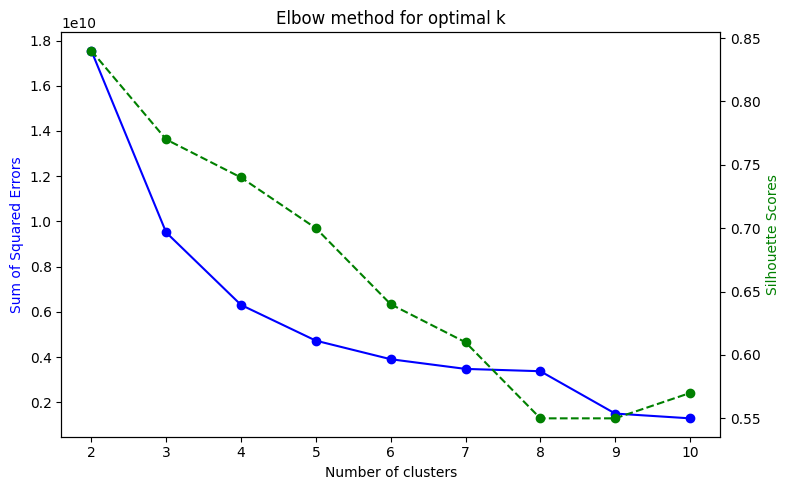

In [19]:
# plot
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(krange, inertia, marker='o', color='blue')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of Squared Errors', color='blue')

ax2 = ax1.twinx()
ax2.plot(krange, silhouette, marker='o', color='green', linestyle='dashed')
ax2.set_ylabel('Silhouette Scores', color='green')
# line2.remove()

plt.title('Elbow method for optimal k')
fig.tight_layout()
plt.show()